In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline
from scipy import linalg as LA
from sklearn.utils import shuffle
plt.style.use("ggplot")

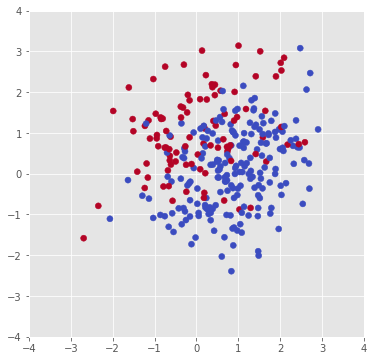

In [66]:
import matplotlib.cm as cm
N = 100

N1 = 100
N2 = 200

mu1 = [0,1]
mu2 = [1,0]
sigma1 = sigma2 = [[1,0.3],[0.3,1]]

data1 = np.random.multivariate_normal(mu1, sigma1, size=N1)
data2 = np.random.multivariate_normal(mu2, sigma2, size=N2)

train_X = np.concatenate((data1, data2))
train_t = np.concatenate((np.repeat(0,N1), np.repeat(1,N2)))
train_X, train_t = shuffle(train_X, train_t)

plt.figure(figsize=(6,6))
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.scatter(train_X[:,0], train_X[:,1], c = train_t, cmap=cm.coolwarm_r)

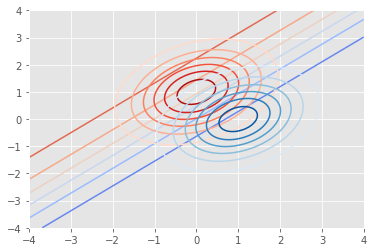

In [78]:
# 最尤法で推定する
from scipy import stats


m1 = np.average(data1, axis=0)
m2 = np.average(data2, axis=0)
S1 = np.cov(data1 - m1, rowvar=False, bias=True)
S2 = np.cov(data2-m2, rowvar=False, bias=True)
S = (N1/(N1+N2))*S1 + (N2/(N1+N2))*S2

X, Y = np.meshgrid(np.linspace(-4,4,100), np.linspace(-4,4, 100))
pos = np.dstack((X,Y))
Z1 = stats.multivariate_normal(mu1, sigma1).pdf(pos)
Z2 = stats.multivariate_normal(mu2, sigma2).pdf(pos)

def sigmoid(x):
  return 1/ (np.exp(-x) + 1)

A = np.linalg.inv(S)
w = A@(m1 - m2)
w_0 = -0.5*m1.T@A@m1 + 0.5*m2.T@A@m2 + np.log(N1/float(N2))

def p_C1(x,y): #事後分布
  return sigmoid( w.T @ np.array([x,y]) + w_0)

Z = np.vectorize(p_C1)(X,Y)

plt.contour(X, Y, Z, cmap=cm.coolwarm)
plt.contour(X, Y, Z1, cmap=cm.Reds)
plt.contour(X, Y, Z2, cmap=cm.Blues)
plt.show()

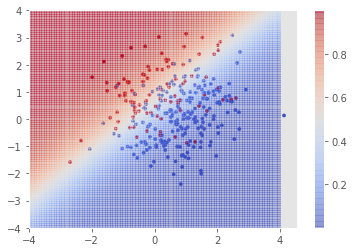

In [86]:
plt.scatter(train_X[:,0], train_X[:,1], c=train_t, cmap=cm.coolwarm_r,s=10)
plt.pcolor(X,Y,Z, cmap=cm.coolwarm, alpha=0.3)
plt.colorbar()
plt.show()